Bir alışveriş merkezinde teknolojik ürünler satan mağazanın müdürü vitrinlerinde tablet ürünlerini en doğru şekilde sergileyebilmek için 2.000 adet tableti fiyat/performans durumlarına göre “Ucuz”, “Normal”, “Pahalı”, “Çok Ucuz” olarak etiketlemiştir.

Mağazasına yeni gelecek tablet ürünlerini etiketleyerek vakit kaybetmek istemeyen IT ekibi mevcut verilerle başarılı bir makine öğrenmesi algoritması geliştirmek istemektedir. Böylelikle yeni gelecek tablet ürünlerini hangi vitrinde sergilemeleri gerektiğini hızlı ve güvenilir şekilde elde edebileceklerdir.

IT ekip lideri bu projeyi keşifçi veri analizi, ön işleme ve tahmine dayalı analitik makine öğrenmesi olmak üzere 3 safha olarak planlamaktadır.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import re #düzenli ifadeler kullanmak için

from sklearn import preprocessing #ön işleme,label encoding vb. içerikler için
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, f1_score, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import *

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz, export_text
from warnings import filterwarnings
from sklearn import ensemble
from sklearn import tree
from sklearn.metrics import confusion_matrix as cm 

from matplotlib.legend_handler import HandlerLine2D

filterwarnings("ignore")

# Keşifçi Veri Analizi(EDA)

In [2]:
tablet = pd.read_csv('../input/tablet/tablet.csv')
df = tablet.copy()
df
# Dizinde bulunan veri çerçevesini tablet değişkenine atadık ve tablet değişkenini df değişkenine kopyalayarak kullanmaya başlayalım.


,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,Yok,2.9,Var,3.0,Var,7,0.8,147,2,6,487,722,1241.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1996,1654,Yok,1.8,Yok,1.0,Yok,11,0.3,146,7,2,1184,1719,1070.0,14,Var,Var,Var,Ucuz,Sarı
1997,742,Yok,2.2,Var,4.0,Yok,56,0.2,190,7,14,577,1359,3557.0,12,Yok,Var,Var,Pahalı,Turuncu
1998,704,Yok,2.2,Var,4.0,Yok,53,0.2,186,6,6,251,1013,3653.0,15,Var,Var,Var,Normal,Turkuaz


Veri çerçevesinin ilk 5 gözlemini görüntüleyelim.

In [3]:
df.head()


,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


Veri çerçevesinin rastgele 5 gözlemini görüntüleyelim.

In [4]:
df.sample(5)

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
41,713,Yok,1.4,Var,4.0,Yok,53,0.8,98,1,17,123,1477,1462.0,13,Var,Yok,Var,Çok Ucuz,Yeşil
267,1564,Yok,1.4,Yok,5.0,Var,26,0.1,129,6,16,117,1115,3742.0,13,Var,Var,Yok,Pahalı,Turkuaz
438,739,Var,2.3,Var,2.0,Var,58,0.1,88,3,4,1052,1536,475.0,6,Var,Yok,Var,Çok Ucuz,Kırmızı
1703,823,Var,2.7,Var,13.0,Yok,60,0.5,148,8,19,822,1449,905.0,17,Var,Var,Var,Çok Ucuz,Mavi
1906,1106,Var,1.9,Yok,4.0,Yok,54,0.7,107,3,9,614,1212,2674.0,9,Var,Yok,Var,Normal,Mor


Veri çerçevesinin son 5 gözlemini görüntüleyelim.

In [5]:
df.tail()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
1995,689,Yok,2.9,Var,3.0,Var,7,0.8,147,2,6,487,722,1241.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1996,1654,Yok,1.8,Yok,1.0,Yok,11,0.3,146,7,2,1184,1719,1070.0,14,Var,Var,Var,Ucuz,Sarı
1997,742,Yok,2.2,Var,4.0,Yok,56,0.2,190,7,14,577,1359,3557.0,12,Yok,Var,Var,Pahalı,Turuncu
1998,704,Yok,2.2,Var,4.0,Yok,53,0.2,186,6,6,251,1013,3653.0,15,Var,Var,Var,Normal,Turkuaz
1999,1872,Yok,0.5,Yok,5.0,Var,26,0.5,172,4,10,672,1088,2273.0,8,Var,Yok,Var,Normal,Siyah


Kaç adet gözlem ve öznitelik olduğuna bakalım.

In [6]:
df.shape

(2000, 20)

info() komutu ile veri çerçevesinin yapısal bilgilerini (değişken tipleri, bellek kullanımı vs.) görüntüleyelim. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

Veri çerçevesindeki sayısal değişkenler için temel istatistik değerlerini görüntüleyelim.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
MikroislemciHizi,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
OnKameraMP,1995.0,4.312281,4.342095,0.0,1.00,3.0,7.00,19.0
DahiliBellek,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
Kalinlik,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
Agirlik,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
CekirdekSayisi,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
ArkaKameraMP,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0
CozunurlukYükseklik,2000.0,645.108000,443.780811,0.0,282.75,564.0,947.25,1960.0
CozunurlukGenislik,2000.0,1251.515500,432.199447,500.0,874.75,1247.0,1633.00,1998.0


* Describe fonksiyonu ile verilerin daha anlamlı hale geldiğini görüyoruz. Bakıldığında standart sapması en fazla olan RAM değeridir.


Bluetooth, CiftHat, 4G, 3G, Dokunmatik, WiFi ve Renk gözlemlerinin ne kadar dengeli dağılıp dağılmadığına bakalım.

In [9]:
df["Bluetooth"].value_counts()

Yok    1010
Var     990
Name: Bluetooth, dtype: int64

In [10]:
df["CiftHat"].value_counts()

Var    1019
Yok     981
Name: CiftHat, dtype: int64

In [11]:
df["4G"].value_counts()

Var    1043
Yok     957
Name: 4G, dtype: int64

In [12]:
df["3G"].value_counts()

Var    1523
Yok     477
Name: 3G, dtype: int64

In [13]:
df["Dokunmatik"].value_counts()

Var    1006
Yok     994
Name: Dokunmatik, dtype: int64

In [14]:
df["WiFi"].value_counts()

Var    1014
Yok     986
Name: WiFi, dtype: int64

In [15]:
df["Renk"].value_counts()

Beyaz         194
Siyah         183
Mor           175
Turuncu       175
Pembe         168
Kırmızı       168
Turkuaz       167
Kahverengi    157
Sarı          156
Yeşil         154
Gri           153
Mavi          150
Name: Renk, dtype: int64

Sayısal değişkenlerin dağılımını görmek için df üzerinden histogram çizdirelim.

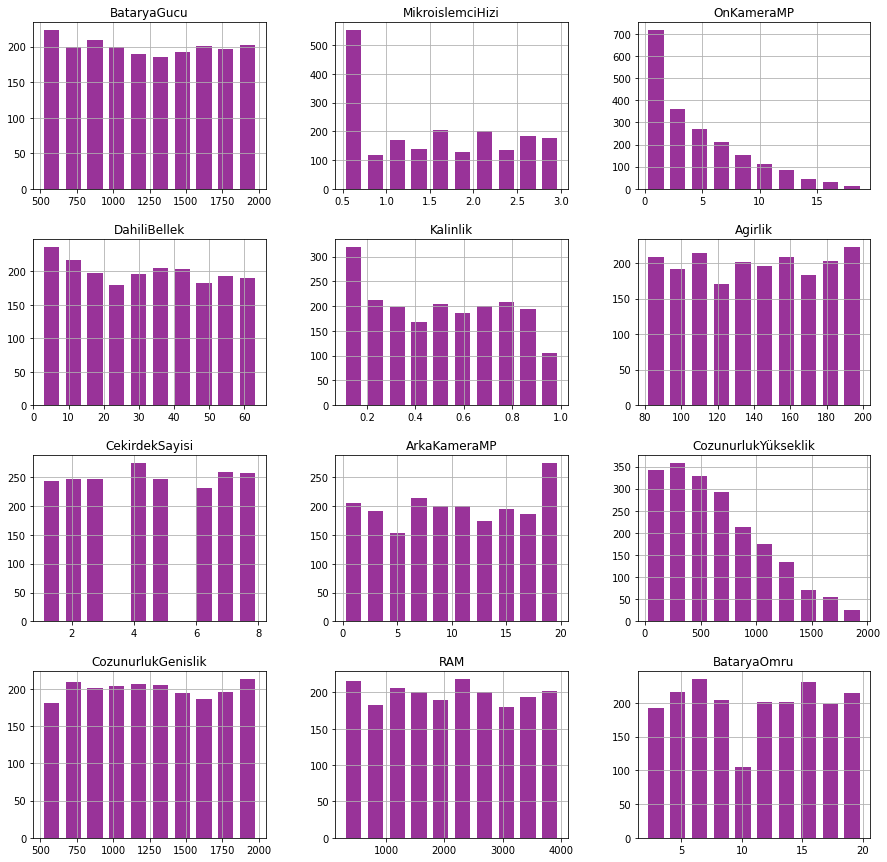

In [16]:
df.hist(figsize = (15,15), rwidth=0.7, alpha=0.8 ,color = "purple")
plt.show()

Veri çerçevesinde toplam kaç adet eksik değer olduğunu görüntülyelim.

In [17]:
df.isna().sum().sum()

17

Eksik gözlemlerin kaç tane ve hangi değişkenlere ait olduğunu görüntüleyelim.

In [18]:
df.isna().sum()

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

Korelasyon değerini görüntüleyelim.

In [19]:
corr = df.corr() 
corr

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
BataryaGucu,1.000000,0.011482,0.032167,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000883,0.052510
MikroislemciHizi,0.011482,1.000000,-0.000172,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003969,-0.011432
OnKameraMP,0.032167,-0.000172,1.000000,-0.028642,-0.001723,0.024585,-0.013721,0.645697,-0.010662,-0.005646,0.012528,-0.007121
DahiliBellek,-0.004004,0.006545,-0.028642,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032883,-0.002790
Kalinlik,0.034085,-0.014364,-0.001723,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.007293,0.017003
Agirlik,0.001844,0.012350,0.024585,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002536,0.006209
CekirdekSayisi,-0.029727,-0.005724,-0.013721,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.005576,0.013148
ArkaKameraMP,0.031441,-0.005245,0.645697,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.029540,0.014657
CozunurlukYükseklik,0.014901,-0.014523,-0.010662,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.023421,-0.010645
CozunurlukGenislik,-0.008402,-0.009476,-0.005646,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.002101,0.006720


* En güçlü pozitif ilişki OnKameraMP ve ArkaKameraMP arasındadır.

Heatmap ile korelasyon değerlerini görselleştirelim.

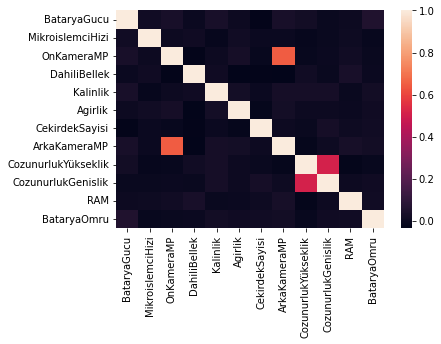

In [20]:
corr = df.corr() 
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values);

Yukarıdaki tabloda da göründüğü gibi tamamına yakını siyah renkte gösterilmiş. Dolayısıyla öznitelikler arasında ilişki yok denecek kadar az diyebiliriz.

Korelasyonda ilişki yönünden (tabloya göre)en yüksek alan iki özniteliği (ArkaKameraMP ve OnKameraMp) korelasyon kullanarak oranını gözlemleyelim.

In [21]:
df.corr()["ArkaKameraMP"]["OnKameraMP"]

0.6456968663318242

Korelasyon tablosunda bir diğer ilişki olan CozunurlukYükseklik ve CozunurlukGenislik öznitelikleri arasında korelasyon oranına bakalım.

In [22]:
df.corr()["CozunurlukYükseklik"]["CozunurlukGenislik"]

0.5106644191393149

Veri Çerçevemizin özniteliklerini kendi içinde değerlendierlim.

In [23]:
df["FiyatAraligi"].unique()
# FiyatAraligi değişkeninin benzersiz değişkenlerini görüntüler.

array(['Normal', 'Pahalı', 'Ucuz', 'Çok Ucuz'], dtype=object)

In [24]:
df['FiyatAraligi'].value_counts()
# Dengeli dağılım var.

Normal      500
Pahalı      500
Ucuz        500
Çok Ucuz    500
Name: FiyatAraligi, dtype: int64

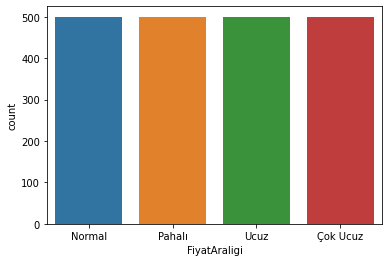

In [25]:
sns.countplot(x = "FiyatAraligi", data = df);

In [26]:
df["ArkaKameraMP"].nunique()
# ArkaKameraMP değişkeninin benzersiz değişken sayısını görüntüler.

21

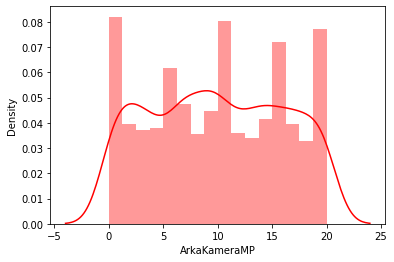

In [27]:
sns.distplot(df["ArkaKameraMP"], bins=16, color="red");
# Dağılım görselleştirmek için distplot fonksiyonu kullanılır.

In [28]:
df["OnKameraMP"].nunique()
# OnKameraMP değişkeninin benzersiz değişken sayısını görüntüler.

20

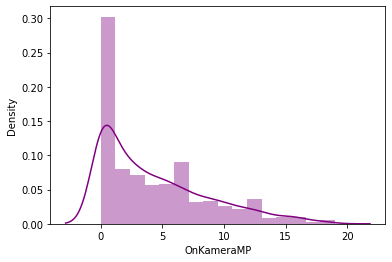

In [29]:
sns.distplot(df["OnKameraMP"], bins=16, color="purple");

In [30]:
df["MikroislemciHizi"].nunique()

26

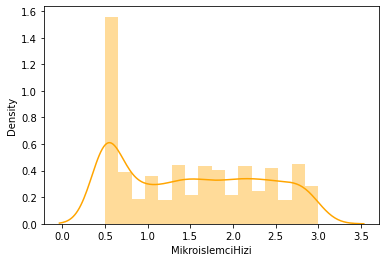

In [31]:
sns.distplot(df["MikroislemciHizi"], bins=16, color="orange");

* Grafikte de görüldüğü gibi o.5 ve 3.0 arasında değerler aldığını söyleyebiliriz.

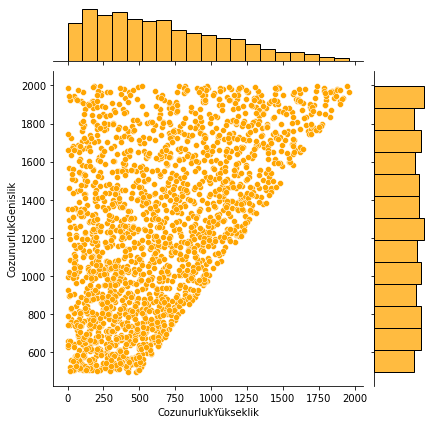

In [32]:
sns.jointplot( x = "CozunurlukYükseklik", y = "CozunurlukGenislik", data= df, color = "orange");

ArkaKameraMP ve OnKameraMP özeniteliklerinin aralarındaki ilişkiyi grafikte inceleyelim.

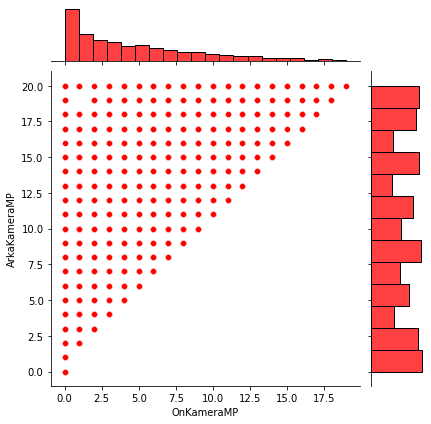

In [33]:
sns.jointplot(x = "OnKameraMP", y = "ArkaKameraMP", data=df, color="red" )

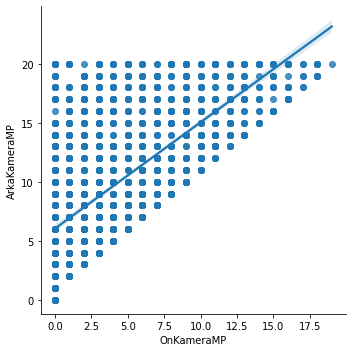

In [34]:
sns.lmplot(x = "OnKameraMP", y = "ArkaKameraMP", data=df)

* Yukarıdaki grafikte de görüldüğü gibi ArkaKameraMP özniteliğinin değeri arttıkça OnKameraMP değeri de aynı oranda artış göstermiştir.

FiyatAraligi özniteliğimiz ile diğer öznitelikler arasındaki ilişkiyi görselleştirelim.

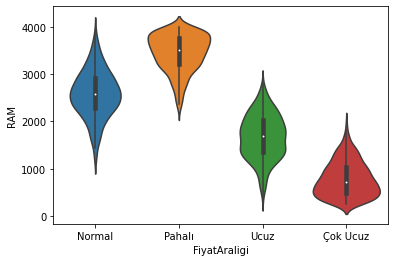

In [35]:
sns.violinplot( x = "FiyatAraligi", y = "RAM", data= df);
# Çok ucuza doğru değerlerin azaldığını söyleyebiliriz.

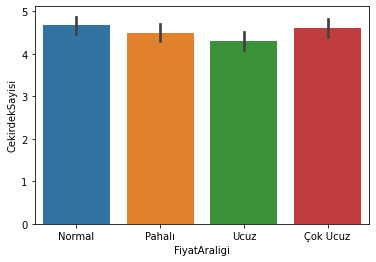

In [36]:
sns.barplot( x = "FiyatAraligi", y = "CekirdekSayisi", data= df);

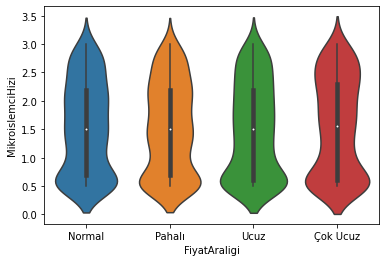

In [37]:
sns.violinplot( x = "FiyatAraligi", y = "MikroislemciHizi", data= df);

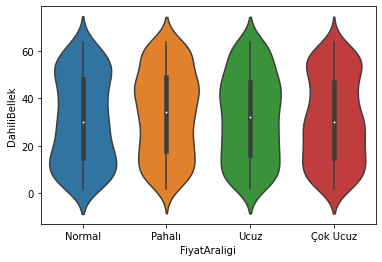

In [38]:
sns.violinplot( x = "FiyatAraligi", y = "DahiliBellek", data= df);

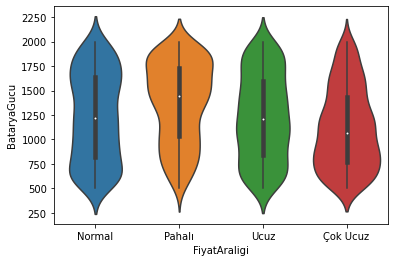

In [39]:
sns.violinplot( x = "FiyatAraligi", y = "BataryaGucu", data= df);

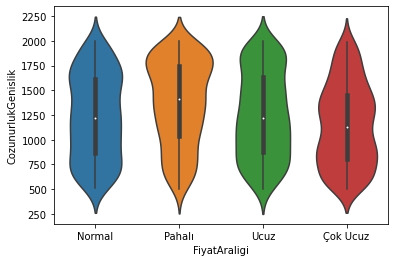

In [40]:
sns.violinplot( x = "FiyatAraligi", y = "CozunurlukGenislik", data= df);

* Genel olarak bakıldığında 'pahalı' kategorisindekilerin diğerlerine oranla daha fazla değerlere sahiptirler.

# VERİ ÖN İŞLEME (DATA PREPROCESSİNG)

## Eksik Verileri Doldurma İşlemleri

* Eksik verilerle başa çıkmanın ilk yöntemi görmezden gelmektir ama çok fazla eksik veri var ise ya da istenmiyorsa kullanılmaz. Bu eksik verilerden direkt olarak kurtulmak için dropna() fonsiyonu kullanılabilir.

İlk olarak eksik değerleri tekrardan yazdıralım.

In [41]:
df.isnull().sum()
# Eksik değerleri görüntüler.

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

Missingno ile birlikte öznitelikleri görselleştirelim.

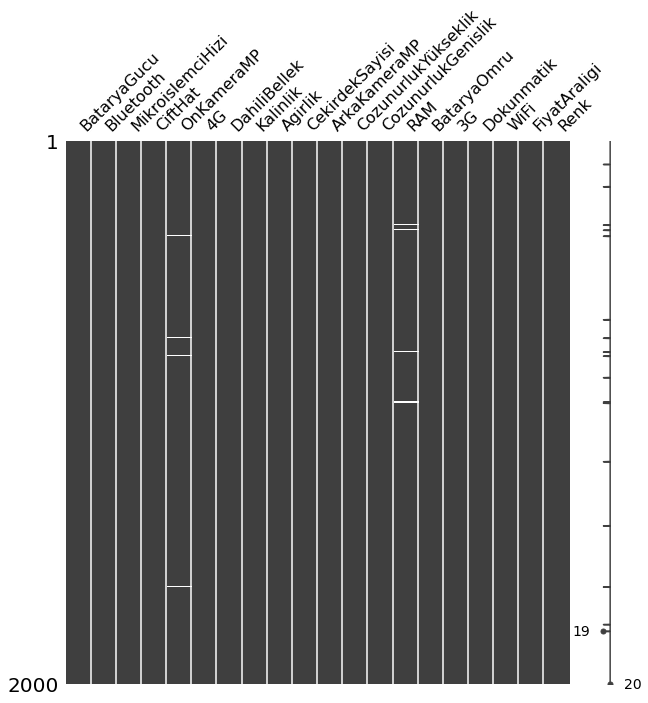

In [42]:
missingno.matrix(df, figsize=(10,10));

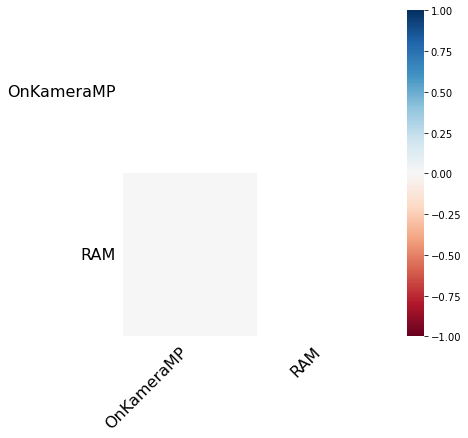

In [43]:
missingno.heatmap(df, figsize=(6,6));
# Daha iyi anlamak için ısı haritası çizdirelim.

Öncelikle OnKameraMP değişkenimizi inceleyelim.

In [44]:
df[df["OnKameraMP"].isnull()]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
351,726,Yok,2.2,Yok,NaN,Var,40,0.8,94,4,20,323,978,1342.0,4,Var,Var,Var,Çok Ucuz,Beyaz
726,1296,Yok,0.9,Var,NaN,Var,14,0.5,124,5,3,811,1272,490.0,4,Var,Var,Var,Çok Ucuz,Sarı
792,504,Yok,2.8,Var,NaN,Yok,40,0.5,178,3,0,626,1195,470.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1416,1617,Var,2.4,Yok,NaN,Var,36,0.8,85,1,9,743,1426,296.0,7,Var,Yok,Yok,Çok Ucuz,Sarı
1641,763,Yok,1.7,Var,NaN,Var,2,0.5,92,8,14,1028,1186,1050.0,8,Var,Var,Yok,Çok Ucuz,Siyah


Eksik veriler diğer verilerle ilişkisi olup olmadığına bakalım.

<AxesSubplot:xlabel='CiftHat', ylabel='count'>

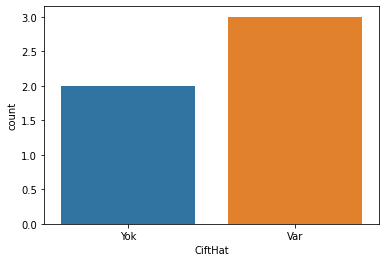

In [45]:
sns.countplot(df[df["OnKameraMP"].isnull()]["CiftHat"])

<AxesSubplot:xlabel='ArkaKameraMP', ylabel='count'>

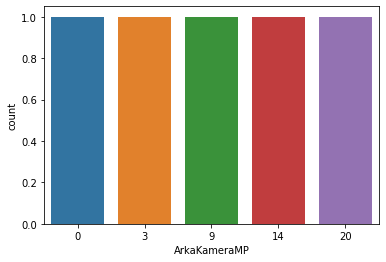

In [46]:
sns.countplot(df[df["OnKameraMP"].isnull()]["ArkaKameraMP"])

<AxesSubplot:xlabel='FiyatAraligi', ylabel='count'>

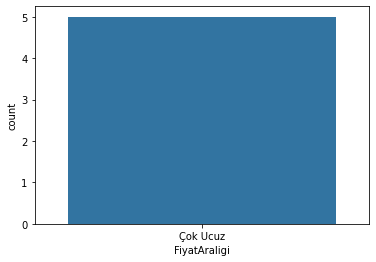

In [47]:
sns.countplot(df[df["OnKameraMP"].isnull()]["FiyatAraligi"])

* Tüm eksik verilerin çok ucuz fiyat aralığında olduğunu görüyoruz. Bu aralıkta ön kamera olmayabilir veya değeri eksik kalmış olabilir.

Şimdi ise eksik değerleri ortalama değerler ile dolduralım. Çünkü bu tarz büyük bir veri setinde el ile doldurmak veya global bir değişkenle doldurmak anlamsız olacaktır.

In [48]:
df.groupby("FiyatAraligi")[["OnKameraMP"]].mean()
#Burada eksik değişkenimizin hedef değişkene göre ortalamasını alıyoruz.

,OnKameraMP
FiyatAraligi,
Normal,4.498000
Pahalı,4.316000
Ucuz,4.340000
Çok Ucuz,4.092929


In [49]:
df[(df["FiyatAraligi"] == "Çok Ucuz") & (df["OnKameraMP"].isnull())]
#Boş verileri hedef değişkenin spesifik özelliğine göre görüntülüyoruz.

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
351,726,Yok,2.2,Yok,NaN,Var,40,0.8,94,4,20,323,978,1342.0,4,Var,Var,Var,Çok Ucuz,Beyaz
726,1296,Yok,0.9,Var,NaN,Var,14,0.5,124,5,3,811,1272,490.0,4,Var,Var,Var,Çok Ucuz,Sarı
792,504,Yok,2.8,Var,NaN,Yok,40,0.5,178,3,0,626,1195,470.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1416,1617,Var,2.4,Yok,NaN,Var,36,0.8,85,1,9,743,1426,296.0,7,Var,Yok,Yok,Çok Ucuz,Sarı
1641,763,Yok,1.7,Var,NaN,Var,2,0.5,92,8,14,1028,1186,1050.0,8,Var,Var,Yok,Çok Ucuz,Siyah


In [50]:
OnKameraMP_eksik = df[(df["FiyatAraligi"] == "Çok Ucuz") & (df["OnKameraMP"].isnull())].index
OnKameraMP_eksik 
#Boş veri içeren indexleri hedef değişkene göre görüntüledik.

Int64Index([351, 726, 792, 1416, 1641], dtype='int64')

Şimdi de OnKameraMp değişkenimizi çok ucuz kategorisinin ortalaması olan 4 ile dolduralım.

In [51]:
df.loc[OnKameraMP_eksik, "OnKameraMP"] = 4

Eksik değerlerin dolup dolmadığına bakamak için tekrardan kontrol edelim.

In [52]:
df.isnull().sum()["OnKameraMP"]

0

* Bütün öznitelikler 0 değerini almış. Sonuç olarak eksik verileri doldurmuş olduk.

Şimdi de aynılarını RAM için yapalım.

In [53]:
df[df["RAM"].isnull()]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
87,1062,Var,2.5,Var,6.0,Yok,10,0.9,160,1,13,1596,1807,NaN,16,Yok,Yok,Var,Pahalı,Gri
169,1944,Var,1.8,Var,0.0,Var,31,0.8,87,4,10,1111,1362,NaN,8,Var,Yok,Yok,Pahalı,Beyaz
310,1479,Var,1.8,Var,0.0,Var,24,0.1,146,6,0,327,645,NaN,5,Var,Yok,Yok,Pahalı,Turuncu
329,1035,Yok,0.6,Var,2.0,Var,44,0.5,99,3,3,236,1960,NaN,12,Var,Var,Yok,Pahalı,Beyaz
658,732,Var,1.3,Yok,5.0,Var,32,0.4,163,8,7,1661,1836,NaN,5,Var,Yok,Var,Pahalı,Siyah
777,753,Var,0.5,Yok,11.0,Var,48,0.1,121,8,20,606,1316,NaN,16,Var,Yok,Yok,Pahalı,Turkuaz
871,1035,Var,2.7,Yok,1.0,Yok,40,0.2,157,5,15,757,1912,NaN,5,Yok,Var,Var,Pahalı,Turuncu
961,1949,Yok,1.3,Var,0.0,Yok,23,0.1,101,5,1,839,1136,NaN,20,Var,Yok,Yok,Pahalı,Sarı
965,1786,Yok,1.2,Yok,11.0,Yok,61,0.1,123,3,14,74,865,NaN,17,Yok,Var,Yok,Pahalı,Kahverengi
1180,1369,Var,1.8,Var,6.0,Yok,34,0.5,162,1,7,553,727,NaN,18,Yok,Var,Var,Pahalı,Turuncu


<AxesSubplot:xlabel='DahiliBellek', ylabel='count'>

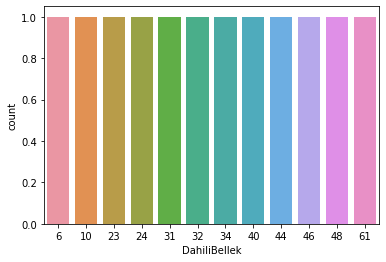

In [54]:
sns.countplot(df[df["RAM"].isnull()]["DahiliBellek"])

<AxesSubplot:xlabel='Renk', ylabel='count'>

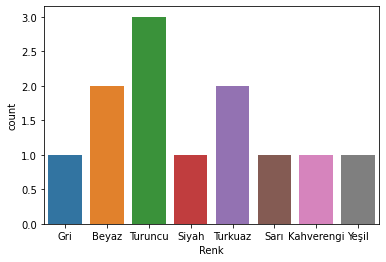

In [55]:
sns.countplot(df[df["RAM"].isnull()]["Renk"])

<AxesSubplot:xlabel='FiyatAraligi', ylabel='count'>

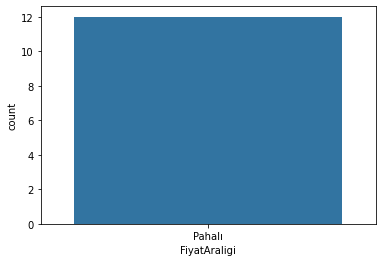

In [56]:
sns.countplot(df[df["RAM"].isnull()]["FiyatAraligi"])

* Tüm eksik verilerin Pahalı fiyat aralığında olduğunu görüyoruz.

In [57]:
df.groupby("FiyatAraligi")[["RAM"]].mean()

,RAM
FiyatAraligi,
Normal,2582.81600
Pahalı,3449.35041
Ucuz,1679.49000
Çok Ucuz,785.31400


In [58]:
df[(df["FiyatAraligi"] == "Pahalı") & (df["RAM"].isnull())]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
87,1062,Var,2.5,Var,6.0,Yok,10,0.9,160,1,13,1596,1807,NaN,16,Yok,Yok,Var,Pahalı,Gri
169,1944,Var,1.8,Var,0.0,Var,31,0.8,87,4,10,1111,1362,NaN,8,Var,Yok,Yok,Pahalı,Beyaz
310,1479,Var,1.8,Var,0.0,Var,24,0.1,146,6,0,327,645,NaN,5,Var,Yok,Yok,Pahalı,Turuncu
329,1035,Yok,0.6,Var,2.0,Var,44,0.5,99,3,3,236,1960,NaN,12,Var,Var,Yok,Pahalı,Beyaz
658,732,Var,1.3,Yok,5.0,Var,32,0.4,163,8,7,1661,1836,NaN,5,Var,Yok,Var,Pahalı,Siyah
777,753,Var,0.5,Yok,11.0,Var,48,0.1,121,8,20,606,1316,NaN,16,Var,Yok,Yok,Pahalı,Turkuaz
871,1035,Var,2.7,Yok,1.0,Yok,40,0.2,157,5,15,757,1912,NaN,5,Yok,Var,Var,Pahalı,Turuncu
961,1949,Yok,1.3,Var,0.0,Yok,23,0.1,101,5,1,839,1136,NaN,20,Var,Yok,Yok,Pahalı,Sarı
965,1786,Yok,1.2,Yok,11.0,Yok,61,0.1,123,3,14,74,865,NaN,17,Yok,Var,Yok,Pahalı,Kahverengi
1180,1369,Var,1.8,Var,6.0,Yok,34,0.5,162,1,7,553,727,NaN,18,Yok,Var,Var,Pahalı,Turuncu


In [59]:
RAM_eksik = df[(df["FiyatAraligi"] == "Pahalı") & (df["RAM"].isnull())].index
RAM_eksik 

Int64Index([87, 169, 310, 329, 658, 777, 871, 961, 965, 1180, 1779, 1804], dtype='int64')

In [60]:
df.loc[RAM_eksik, "RAM"] = 3500

In [61]:
df.isnull().sum()["RAM"]

0

In [62]:
df.isnull().sum() #Eksik veri kalmadığını görüyoruz.

BataryaGucu            0
Bluetooth              0
MikroislemciHizi       0
CiftHat                0
OnKameraMP             0
4G                     0
DahiliBellek           0
Kalinlik               0
Agirlik                0
CekirdekSayisi         0
ArkaKameraMP           0
CozunurlukYükseklik    0
CozunurlukGenislik     0
RAM                    0
BataryaOmru            0
3G                     0
Dokunmatik             0
WiFi                   0
FiyatAraligi           0
Renk                   0
dtype: int64

## Kategorik Değişkenleri Sayısallaştıralım.

In [63]:
label_encoder = preprocessing.LabelEncoder()
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


Sırasıyla sayısal değişkenler ile doldurmaya başlayalım.

In [64]:
df["Bluetooth"] = label_encoder.fit_transform(df["Bluetooth"])
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,0,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,1,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,1,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,1,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [65]:
df["CiftHat"] = label_encoder.fit_transform(df["CiftHat"])
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,0,2.8,0,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,1,1.3,0,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,1,0.5,0,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,1,1.0,1,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [66]:
df["WiFi"] = label_encoder.fit_transform(df["WiFi"])
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,1,Normal,Beyaz
1,1046,0,2.8,0,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,0,Pahalı,Pembe
2,843,1,1.3,0,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,0,Ucuz,Mor
3,894,1,0.5,0,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,0,Pahalı,Turuncu
4,936,1,1.0,1,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,0,Normal,Beyaz


In [67]:
df["3G"] = label_encoder.fit_transform(df["3G"])
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,0,Yok,1,Normal,Beyaz
1,1046,0,2.8,0,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,0,Var,0,Pahalı,Pembe
2,843,1,1.3,0,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,1,Yok,0,Ucuz,Mor
3,894,1,0.5,0,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,0,Yok,0,Pahalı,Turuncu
4,936,1,1.0,1,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,0,Var,0,Normal,Beyaz


In [68]:
df["4G"] = label_encoder.fit_transform(df["4G"])
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499,695,2328.0,2,0,Yok,1,Normal,Beyaz
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259,1040,3863.0,9,0,Var,0,Pahalı,Pembe
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593,732,1734.0,14,1,Yok,0,Ucuz,Mor
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285,1462,3615.0,6,0,Yok,0,Pahalı,Turuncu
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330,1686,2391.0,3,0,Var,0,Normal,Beyaz


In [69]:
df["Dokunmatik"] = label_encoder.fit_transform(df["Dokunmatik"])
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499,695,2328.0,2,0,1,1,Normal,Beyaz
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259,1040,3863.0,9,0,0,0,Pahalı,Pembe
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593,732,1734.0,14,1,1,0,Ucuz,Mor
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285,1462,3615.0,6,0,1,0,Pahalı,Turuncu
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330,1686,2391.0,3,0,0,0,Normal,Beyaz


In [70]:
df["Renk"].unique()

array(['Beyaz', 'Pembe', 'Mor', 'Turuncu', 'Gri', 'Sarı', 'Mavi',
       'Turkuaz', 'Kahverengi', 'Yeşil', 'Kırmızı', 'Siyah'], dtype=object)

get_dummies yardımıyla Renk'e dair kategorik öznitelikleri sayısal değişkenlerine çevirerek bakalım. 

In [71]:
df["Renk"] = pd.Categorical(df["Renk"])
df_Renk = pd.get_dummies(df["Renk"], prefix = "Renk")
df_Renk

,Renk_Beyaz,Renk_Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,1,0,0,0
1996,0,0,0,0,0,0,0,1,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,1,0
1998,0,0,0,0,0,0,0,0,0,1,0,0


Oluşturduğumuz df_Renk veri setimizi df veri setimizle birleştirerek tek tablo haline getirelim.

In [72]:
df = pd.concat([df,df_Renk], axis=1)
df.head()



,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,...,0,0,0,0,1,0,0,0,0,0
2,843,1,1.3,0,1.0,1,16,0.9,119,7,...,0,0,0,1,0,0,0,0,0,0
3,894,1,0.5,0,1.0,0,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,1,1.0,1,1.0,1,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df.drop(["Renk"], axis = 1, inplace = True)
#sayısal olmayan değişkenleri drop ile kaldırıyoruz. axis = 1 olduğu için sütunlarda işlem yapıyoruz.

Ordinal değerleri sayısallaştıralım.

In [74]:
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,...,0,0,0,0,1,0,0,0,0,0
2,843,1,1.3,0,1.0,1,16,0.9,119,7,...,0,0,0,1,0,0,0,0,0,0
3,894,1,0.5,0,1.0,0,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,1,1.0,1,1.0,1,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0


# MAKİNE ÖĞRENMESİ (MACHİNE LEARNİNG)

Makine öğrenmesi modellemeleri yapabilmek için hedef değişkenimiz olan 
“FiyatAraligi” değişkeni ve bu değişkeni tahmin etmemize yardımcı olacak diğer değişkenler 
bağımlı ve bağımsız değişkenler olmak üzere ayrılmalıdır. 

'FiyatAraligi' değişkenimizi (hedef değişkenimiz olduğu için) bağımlı değişken yapalım. Kısaca veri setini bağımlı ve bağımsız değişkenler olarak bölütleyelim. 

In [75]:
x = df.drop("FiyatAraligi", axis=1) #bağımsız değişken
y = df["FiyatAraligi"] #bağımlı değişken

Bağımlı ve bağımsız değişkenleri kontrol edelim.

In [76]:
x #bağımsız değişkenimizi görüntüledik.

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,...,0,0,0,0,1,0,0,0,0,0
2,843,1,1.3,0,1.0,1,16,0.9,119,7,...,0,0,0,1,0,0,0,0,0,0
3,894,1,0.5,0,1.0,0,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,1,1.0,1,1.0,1,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,1,2.9,0,3.0,0,7,0.8,147,2,...,0,0,0,0,0,0,1,0,0,0
1996,1654,1,1.8,1,1.0,1,11,0.3,146,7,...,0,0,0,0,0,1,0,0,0,0
1997,742,1,2.2,0,4.0,1,56,0.2,190,7,...,0,0,0,0,0,0,0,0,1,0
1998,704,1,2.2,0,4.0,1,53,0.2,186,6,...,0,0,0,0,0,0,0,1,0,0


In [77]:
y #bağımlı değişkenimizi görüntüledik.

0         Normal
1         Pahalı
2           Ucuz
3         Pahalı
4         Normal
          ...   
1995    Çok Ucuz
1996        Ucuz
1997      Pahalı
1998      Normal
1999      Normal
Name: FiyatAraligi, Length: 2000, dtype: object

Bu bağımlı ve bağımsız değişkenlerden train ve test olmak üzere 4 parça oluşturalım. %75 oranında eğitim ve %25 oranında test olmak üzere train_test_split metodunu kullanalım. 

In [78]:
#from sklearn.model_selection import train_test_split yukarıda yapmıştık zaten.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
#test_size: yüzdelik olarak test için ne kadar veri alınacağını ifade eder.

4 parça değişkeni kontrol edelim.

In [79]:
x_train.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
1738,867,1,1.4,0,0.0,0,4,0.7,135,6,...,0,0,0,0,0,0,1,0,0,0
548,1404,1,2.1,1,16.0,1,44,0.9,151,1,...,1,0,0,0,0,0,0,0,0,0
936,683,0,2.1,1,7.0,1,30,0.1,197,7,...,0,0,0,0,0,0,1,0,0,0
1389,1109,0,2.8,0,6.0,1,57,0.9,151,1,...,0,0,0,0,0,0,0,0,1,0
1607,1395,1,1.8,0,0.0,1,23,0.1,111,3,...,0,0,0,0,0,0,0,0,0,0


In [80]:
x_test.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
1860,1433,0,2.3,1,2.0,0,5,0.1,129,5,...,0,0,0,0,0,0,0,0,0,0
353,1174,0,0.9,1,7.0,1,30,1.0,147,4,...,0,0,0,0,0,0,1,0,0,0
1333,999,1,2.6,0,11.0,0,56,1.0,165,4,...,0,0,0,0,1,0,0,0,0,0
905,972,0,0.5,0,5.0,1,13,0.4,193,5,...,0,0,0,0,0,0,0,1,0,0
1289,1811,0,2.5,1,4.0,0,5,0.6,98,4,...,0,0,0,0,0,1,0,0,0,0


In [81]:
y_train.head()

1738    Çok Ucuz
548         Ucuz
936         Ucuz
1389      Normal
1607      Normal
Name: FiyatAraligi, dtype: object

In [82]:
y_test.head()

1860        Ucuz
353     Çok Ucuz
1333      Normal
905         Ucuz
1289      Normal
Name: FiyatAraligi, dtype: object

GaussianNB modeli yaratalım ve x_train ve y_train'leri kullanarak eğitimi gerçekleştirelim. fit() model uydurmamızı sağlar. Makine öğrenim modelinin üzerinde eğitildiği veriye benzer verileri ne kadar iyi genelleme yaptığının bir ölçüsüdür diyebiliriz.

In [83]:
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train) 
nb_model

GaussianNB()

In [84]:
dir(nb_model) 
#dir() nesnelerin özellikleri hakkında bilgi edinmemizi sağlar.
#linear regrasyon modeline ait yazılabilecek komutları görüntüler.

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_X',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_joint_log_likelihood',
 '_more_tags',
 '_partial_fit',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_update_mean_variance',
 '_validate_data',
 'class_count_',
 'class_prior_',
 'classes_',
 'epsilon_',
 'feature_names_in_',
 'fit',
 'get_params',
 'n_features_in_',
 'partial_fit',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'priors',
 'score',
 'set_params',
 'sigma_',
 'theta_',
 'var_',
 'var_smoothing']

Modele daha önce görmediği bağımlı test değişkenini tahmin ettirelim.

In [85]:
nb_model.predict(x.sample(10)) #Tahmin değerlerimizi bulmak için predict fonksiyonu kullanılır. Burada x_test'in ilk 10 gözleminin ait olduğu türü tahmin ettiriyoruz.

array(['Normal', 'Çok Ucuz', 'Çok Ucuz', 'Pahalı', 'Normal', 'Çok Ucuz',
       'Pahalı', 'Pahalı', 'Çok Ucuz', 'Ucuz'], dtype='<U8')

Bu tahmin değerlerimizi y_pred değişkenine atayalım.

In [86]:
y_pred=nb_model.predict(x_test) 
y_pred

array(['Normal', 'Çok Ucuz', 'Pahalı', 'Ucuz', 'Normal', 'Normal',
       'Pahalı', 'Ucuz', 'Normal', 'Ucuz', 'Ucuz', 'Normal', 'Normal',
       'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Ucuz', 'Çok Ucuz',
       'Ucuz', 'Ucuz', 'Ucuz', 'Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Normal',
       'Çok Ucuz', 'Normal', 'Çok Ucuz', 'Çok Ucuz', 'Ucuz', 'Çok Ucuz',
       'Normal', 'Normal', 'Normal', 'Normal', 'Pahalı', 'Pahalı',
       'Çok Ucuz', 'Çok Ucuz', 'Ucuz', 'Normal', 'Ucuz', 'Pahalı',
       'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz',
       'Normal', 'Pahalı', 'Pahalı', 'Pahalı', 'Normal', 'Çok Ucuz',
       'Çok Ucuz', 'Çok Ucuz', 'Ucuz', 'Normal', 'Pahalı', 'Çok Ucuz',
       'Ucuz', 'Normal', 'Ucuz', 'Pahalı', 'Çok Ucuz', 'Ucuz', 'Çok Ucuz',
       'Çok Ucuz', 'Normal', 'Ucuz', 'Pahalı', 'Çok Ucuz', 'Ucuz',
       'Normal', 'Normal', 'Pahalı', 'Pahalı', 'Ucuz', 'Ucuz', 'Çok Ucuz',
       'Çok Ucuz', 'Pahalı', 'Normal', 'Ucuz', 'Pahalı', 'Ucuz',
       'Çok Ucuz',

Doğruluk skorumuzu görüntüleyelim.

In [87]:
accuracy_score(y_test,y_pred)
#Doğruluk skoru
#burada y_test ögesinin bir y_pred ögesine eşit olduğu tum dizinleri sayar ve ardından onu listedeki toplam öge sayısına böler.
#çıkan sonuç kadar doğru tahminde bulunmuş oluruz.

0.746

Karmaşıklık matrisini yazdıralım. 
Karmaşıklık matrisi, veri setindeki var olan durum ile sınıflandırma modelimizin doğru ve yanlış tahminlerinin sayısını tablo olarak göstermektir.

In [88]:
kar_matris = confusion_matrix(y_test,y_pred)
print(kar_matris)

[[ 80  19  32   0]
 [ 27  85   1   0]
 [ 25   0  90  12]
 [  0   0  11 118]]


Karmaşıklık matris skorunu hesaplayalım.

In [89]:
(kar_matris[0][0] + kar_matris[1][1] + kar_matris[2][2] + kar_matris[3][3]) / (kar_matris[0][0] + kar_matris[1][1]+ kar_matris[1][0] + kar_matris[0][1] + kar_matris[0][2] + kar_matris[1][2] + kar_matris[0][3] + kar_matris[1][3] + kar_matris[2][1] + kar_matris[2][2] + kar_matris[2][3] + kar_matris[2][0] + kar_matris[3][0] +kar_matris[3][1] + kar_matris[3][2] + kar_matris[3][3])

0.746

* Yukarıda yaptığımız accuracy_score() ile aynı sonucu vermiş oldu.

Modeli farklı gözlemlerle kombinleyerek tekrardan skorunu hesaplayalım.

In [90]:
cvc=cross_val_score(nb_model, x_test, y_test, cv=10)
cvc

array([0.6 , 0.72, 0.66, 0.54, 0.64, 0.54, 0.58, 0.62, 0.6 , 0.76])

Şimdi de bunu 10 kez tekrarlayarak aldığımız skorun ortalamasını alalım.

In [91]:
cvc.mean()

0.626

Kesinlik skorunu görüntüleyelim.
* Hassasiyet(precision): Pozitif tahmin edilenlerin, gerçekte hangi oranda pozitif olduğunu buluruz. 0-1 arasında mümkün olduğunca yüksek değer almalıdır.

In [92]:
PrecisionScore = precision_score(y_test, y_pred, average="weighted")
PrecisionScore

0.7482810475594058

Yakalama skorunu görüntüleyelim.
* Recall(Duyarlılık): Pozitif durumların ne kadar başarılı tahmin edildiğini gösterir. En iyi değer 1 ,en kütü değer 0'dır.

In [93]:
RecallScore = recall_score(y_test, y_pred, average="weighted")
RecallScore

0.746

F1 Score'unu görüntüleyelim.
* F1 Score değeri bize Kesinlik (Precision) ve Duyarlılık (Recall) değerlerinin ağırlıklı ortalamasını göstermektedir.

In [94]:
F1Score = f1_score(y_test, y_pred, average ="weighted")
F1Score

0.7467035431071347

Modellerin başarısını 
değerlendirme konusunda F1_Score, Precision, Recall değerleri “classification_report” 
aracılığıyla yazdıralım.

Sınıflandırma raporu ile yazdıralım.

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Normal       0.61      0.61      0.61       131
      Pahalı       0.82      0.75      0.78       113
        Ucuz       0.67      0.71      0.69       127
    Çok Ucuz       0.91      0.91      0.91       129

    accuracy                           0.75       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.75      0.75      0.75       500



Modelin daha iyi doğruluk skoru vermesi için ne yapılabilir? Feature Selection?

In [96]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [97]:
x.columns

Index(['BataryaGucu', 'Bluetooth', 'MikroislemciHizi', 'CiftHat', 'OnKameraMP',
       '4G', 'DahiliBellek', 'Kalinlik', 'Agirlik', 'CekirdekSayisi',
       'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM',
       'BataryaOmru', '3G', 'Dokunmatik', 'WiFi', 'Renk_Beyaz', 'Renk_Gri',
       'Renk_Kahverengi', 'Renk_Kırmızı', 'Renk_Mavi', 'Renk_Mor',
       'Renk_Pembe', 'Renk_Sarı', 'Renk_Siyah', 'Renk_Turkuaz', 'Renk_Turuncu',
       'Renk_Yeşil'],
      dtype='object')

Kaç adet öznitelik var bulalım.

In [98]:
len(x.columns)

30

Feture selection yöntemi modelin daha iyi doğruluk skoru vermesi için kullanacağız. Ayrıyeten her bir bağımsız değişken için istatistik hesaplandıktan sonra filtreleme yapmamızı sağlayan KBest tekniğini kullanalım.

In [99]:
test = SelectKBest(k=24)
test

SelectKBest(k=24)

Yukarıda bağımlı ve bağımsız değişkenler oluşturmuştuk. Oradaki test nesnesine parametre olarak girelim ve eğitelim.

In [100]:
fit = test.fit(x,y)
fit

SelectKBest(k=24)

Tüm skorları görüntüleyelim.

In [101]:
set_printoptions(precision = 2) #precision, virgğlden sonra kaç karakter girileciğini belirler.
print(fit.scores_)

[3.16e+01 4.77e-01 4.94e-01 4.28e-01 7.42e-01 1.06e+00 2.92e+00 1.50e+00
 3.59e+00 2.63e+00 8.25e-01 1.95e+01 2.26e+01 3.55e+03 1.63e+00 4.57e-01
 1.29e+00 2.85e-01 7.99e-01 7.42e-01 1.85e+00 3.29e-01 8.55e-01 5.90e-01
 4.85e-01 2.22e-01 1.31e+00 2.38e+00 5.73e-01 2.45e+00]


Daha iyi görüntülemek için bir döngü yazalım ve karşılarına da öznitelik isimlerini ekleyelim.

In [102]:
for indis, skor in enumerate(fit.scores_): #enumerate() methodu itere edilebilir bir objenin(list, string, tuple vb) itemlarına birer index numarası verir.
    print(skor, "->", x.columns[indis])

31.59815753989697 -> BataryaGucu
0.47676770911738764 -> Bluetooth
0.49370780102890643 -> MikroislemciHizi
0.4282392855760711 -> CiftHat
0.7423048791241005 -> OnKameraMP
1.0595245262721884 -> 4G
2.9229960794178416 -> DahiliBellek
1.5006824396689178 -> Kalinlik
3.5943181851549952 -> Agirlik
2.6254151540861677 -> CekirdekSayisi
0.8254463576889531 -> ArkaKameraMP
19.484841776704883 -> CozunurlukYükseklik
22.620882490611052 -> CozunurlukGenislik
3547.9679261399183 -> RAM
1.6288113087357383 -> BataryaOmru
0.45731974970570366 -> 3G
1.2933022318768916 -> Dokunmatik
0.2849404695195694 -> WiFi
0.7985277644423141 -> Renk_Beyaz
0.7424648216639064 -> Renk_Gri
1.8515556048444797 -> Renk_Kahverengi
0.32874764864466033 -> Renk_Kırmızı
0.8546411492461239 -> Renk_Mavi
0.5900785144514252 -> Renk_Mor
0.4845836368050502 -> Renk_Pembe
0.2221109441940691 -> Renk_Sarı
1.305164828542163 -> Renk_Siyah
2.379774003890458 -> Renk_Turkuaz
0.5733834743549536 -> Renk_Turuncu
2.4523654851009753 -> Renk_Yeşil


## Decision Tree (Karar Ağacı) Algoritması

DecisionTree algoritmasının varsayılan olarak (criterion = “gini”) parametre 
değerini kullandığını ancak bu problem için criterion parametresini (criterion = “entropy”)
olacak şekilde değiştirdiklerinde başarının artacağı varsayılmıştır.

Modelimizi inşa edelim ve eğitelim.

In [103]:
cart = DecisionTreeClassifier(random_state = 42, criterion = "entropy")
cart_model = cart.fit(x_train, y_train)
cart_model

DecisionTreeClassifier(criterion='entropy', random_state=42)

Parametreleri optimize etmeden kurduğumuz bu model için tahminlerde bulunalım.

In [104]:
y_pred = cart_model.predict(x_test)

Doğruluk skorunu görüntüleyelim.

In [105]:
accuracy_score(y_test, y_pred)

0.874

Modelin tüm verileri öğrendiği görülmekte. Karmaşıklık matrisini yazdıralım.

In [106]:
kar_matris = confusion_matrix(y_test, y_pred)
print(kar_matris)

[[111  12   8   0]
 [ 17  96   0   0]
 [ 12   0 106   9]
 [  0   0   5 124]]


Modeli farklı gözlemlerle kombinleyerek tekrardan skorunu hesaplayalım.

In [107]:
cvs = cross_val_score(cart_model, x, y, cv=15)
cvs

array([0.82, 0.87, 0.84, 0.81, 0.86, 0.82, 0.88, 0.89, 0.86, 0.86, 0.82,
       0.86, 0.86, 0.85, 0.89])

In [108]:
cvs.mean()
# 15 skorun ortalamasını alıyoruz.

0.8535330864474618

Hedef özniteliği değerlerine göre sınıflandırma raporuna göre görüntüleyelim.

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Normal       0.79      0.85      0.82       131
      Pahalı       0.89      0.85      0.87       113
        Ucuz       0.89      0.83      0.86       127
    Çok Ucuz       0.93      0.96      0.95       129

    accuracy                           0.87       500
   macro avg       0.88      0.87      0.87       500
weighted avg       0.88      0.87      0.87       500



Modelin karar ağacını çizdirelim.

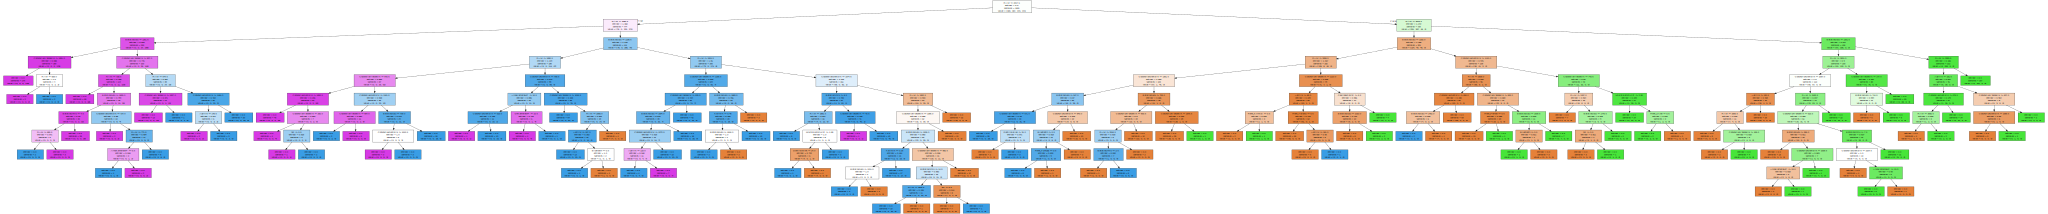

In [110]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(tree.export_graphviz(cart, out_file = None, feature_names = x.columns ,filled = True))
display(SVG(graph.pipe(format = 'svg')))

* Özniteliklerin karar ağacına göre önem sıralamasına bakalım.

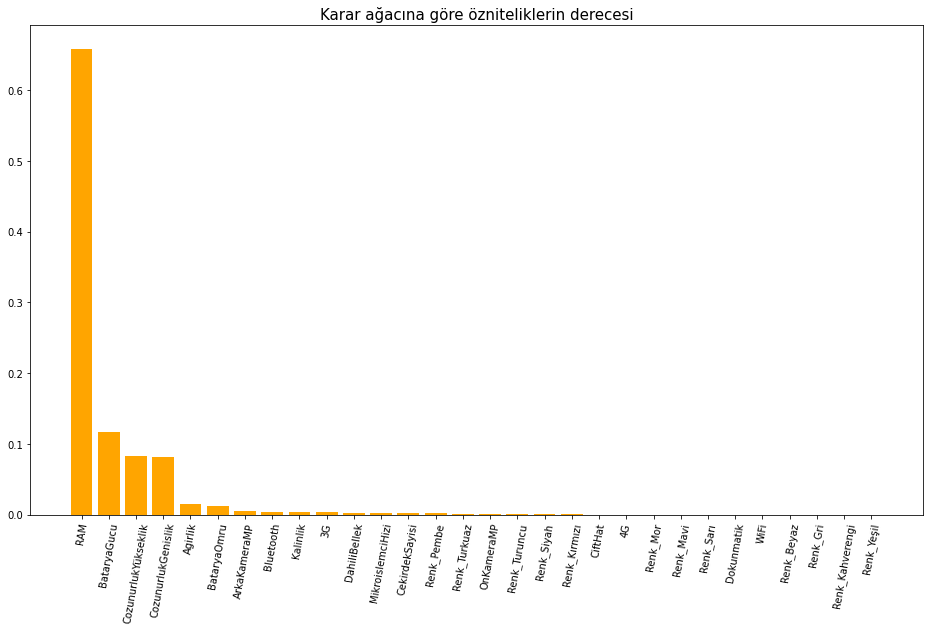

In [111]:
ranking = cart.feature_importances_
features = np.argsort(ranking)[::-1][:36]
columns = x.columns

plt.figure(figsize = (16,9))
plt.title("Karar ağacına göre özniteliklerin derecesi" ,y = 1, size=15)
plt.bar(range(len(features)), ranking[features], align = "center",color = "orange")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

## K Nearest Neighbor (K En Yakın Komşu) Algoritması

1. Tüm kayıtlar n boyutlu uzay üzerinde temsil edilir.
1. Yeni bir örnek geldiği anda eğitim veri kümesine bakılarak sınıflandırma işlemi gerçekleştirilir.
1. Yeni gelen örneğin vektör değerleri ile uzaydaki tüm kayıtların (veri kümesi) vektör değerlei karşılaştırılır.

KNN algoritması adımları:
* ilk olarak k parametresi belirlenir. Bu parametre verilen bir noktaya en yakın komşuların sayısıdır. Örneğin k=2 olsun. Bu durumda en yakın iki komşuya göre sınıfandırma yapılacaktır. 
* Örnek veri setine katılacak olan yeni verinin mevcut verilere göre uzaklığı tek tek hesaplanır. İlgili uzaklık fonksiyonları yardımıyla.
* İlgili uzaklıklarda en yakın k komşusu ele alınır. Öznitelik değerlerine göre k komşu veya komşuların sınıfına atanır. 
* Seçilen sınıf tahmin edilmesi beklenne gözlem değerinin sınıfı olarak kabul edilir. Yani yeni veri etiketlenmiş (label) olur.


Veri çerçevemizde bağımlı ve bağımsız değişkenleri bölütleyip parçalamıştık. Onları KNN modeline uyarlayalım.

Hiçbir parametre optimizasyonu yapmadığımız için parametreleri ve varsayılan değerleri inceleyelim.

In [112]:
knn = KNeighborsClassifier()
knn_model= knn.fit(x_train, y_train)
knn_model
# KNeighborsClassifier() sınıfından Knn nesnesi oluşturup modeli eğitiyoruz.

KNeighborsClassifier()

Bu parametre değerleri üzerinden eğitim modelimizin tüm gözlemler için tahminde bulunmasını isteyelim.

In [113]:
y_pred = knn_model.predict(x)

Tüm gözlemler için bulunduğu tahminlere göre doğruluk skorunu görütüleyelim.

In [114]:
accuracy_score(y, y_pred)

0.9455

Model tüm verileri öğrendi. Şimdi de karmaşılık matrisini çizdirelim.

In [115]:
kar_matris = confusion_matrix(y, y_pred)
print(kar_matris)

[[452  24  24   0]
 [ 20 480   0   0]
 [ 13   0 468  19]
 [  0   0   9 491]]


Modeli farklı gözlemlerle kombinleyerek tekrardan skorunu hesaplayalım ve ortalamasını yazdıralım.

In [116]:
cvs = cross_val_score(cart_model, x, y, cv=15)
cvs.mean()

0.8535330864474618

Hedef özniteliğin  değerlerine göre sınıflandırma raporunu görüntüleyelim.

In [117]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      Normal       0.93      0.90      0.92       500
      Pahalı       0.95      0.96      0.96       500
        Ucuz       0.93      0.94      0.94       500
    Çok Ucuz       0.96      0.98      0.97       500

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



Komşu sayısının çok kritik olduğunu ve 2’den 15’e kadar olan her sayıyı komşu sayısı olarak deneyerek her denemede modelin skorunu kaydedelim.

In [118]:
knn_params = {"n_neighbors": np.arange(2,15)} #parametre optimizasyonu ile tekrardan knn kuruyoruz.

Eğitimi gerçekleştirelim.

In [119]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv = 3)
knn_cv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [120]:
print("En iyi Skor: " + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi Skor: 0.934
En iyi parametreler: {'n_neighbors': 9}


In [121]:
knn = KNeighborsClassifier(9)
knn_tuned = knn.fit(x_train, y_train)
# x_test için tahmin yapılıp yine y_pred de tutuluyor.

In [122]:
y_pred = knn_tuned.predict(x_test)

Doğruluk skorunu görüntüleyelim.

In [123]:
accuracy_score(y_test, y_pred)

0.934

Komşu sayısının değişimi ile modelin skorunun da değişeceğini ve her komşu sayısına tekabül eden model skorunu bir plot çizdirerek görselleştirelim.

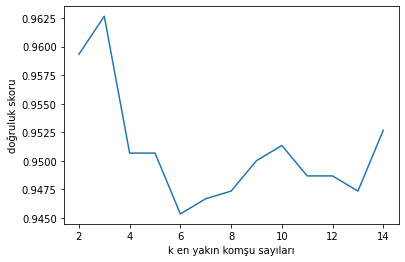

In [124]:
score_list = []

for each in range(2,15,1):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_train, y_train))
    
plt.plot(range(2,15,1), score_list)    
plt.xlabel("k en yakın komşu sayıları")
plt.ylabel("doğruluk skoru")
plt.show()